In [206]:
%pip install prophet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [207]:
import pandas as pd
from prophet import Prophet

# mengimport library panda, prophet, dan matplotlib

In [208]:
file_path = 'Data_Penjualan_Aki.csv'  # mengimport dataset
data = pd.read_csv(file_path)
data

,tanggal,jumlah,nama barang,pemesan,harga
0,1/6/2023,2,N100,Maju Jaya,3190000
1,1/6/2023,2,NS70,Maju Jaya,2214000
2,1/7/2023,2,N150,Juniarta,6741000
3,1/7/2023,1,N120,Hasta,1870000
4,1/9/2023,1,N50,NE Genset Bali,691000
...,...,...,...,...,...
218,9/25/2023,2,N70,Arif,2116000
219,9/25/2023,2,NS70,Maju Jaya,2290000
220,9/26/2023,2,NS70,Bambang,2086000
221,9/26/2023,1,N70,Brabus,1185000


In [209]:
# Mengonversi kolom tanggal menjadi tipe datetime
data['tanggal'] = pd.to_datetime(data['tanggal'])

# Mengelompokkan data berdasarkan nama barang untuk melihat total penjualan per produk
penjualan_per_produk = data.groupby('nama barang')['harga'].sum().sort_values(ascending=False)

# Menampilkan 5 produk terlaris
penjualan_per_produk.head()


nama barang
N120    86422000
N100    70563000
N200    64642000
N150    51503000
N70     39173800
Name: harga, dtype: int64

In [210]:
# Filter data untuk memastikan hanya tanggal yang valid
# Misalnya, kita hanya menerima data hingga hari ini
import datetime as dt
today = dt.datetime.today()
data = data[data['tanggal'] <= today]

# Periksa kembali data setelah pembersihan
print(data['tanggal'].describe())

count                     223
unique                    133
top       2023-05-10 00:00:00
freq                        5
first     2023-01-06 00:00:00
last      2023-09-27 00:00:00
Name: tanggal, dtype: object


C:\Users\Lindan\AppData\Local\Temp\ipykernel_27972\2661696168.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(data['tanggal'].describe())


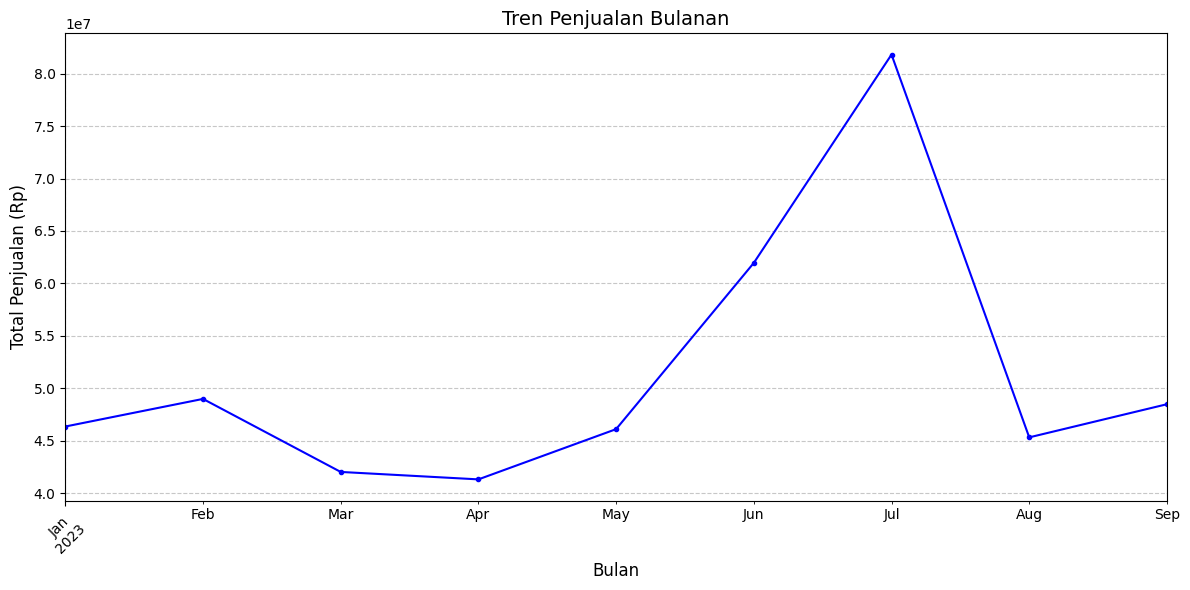

In [211]:
import matplotlib.pyplot as plt

# Visualisasi total penjualan per produk (5 teratas)
# Agregasi ulang data berdasarkan bulan
data['bulan'] = data['tanggal'].dt.to_period('M')
penjualan_bulanan = data.groupby('bulan')['harga'].sum()

# Visualisasi ulang tren penjualan bulanan
penjualan_bulanan.plot(kind='line', marker='.', color='blue', figsize=(12, 6))
plt.title('Tren Penjualan Bulanan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Penjualan (Rp)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [212]:
data_daily = data.groupby('tanggal')['jumlah'].sum().reset_index()
data_daily
# menjumlahkan transaksi berdasarkan tanggal, untuk mencari berapa transaksi dalam 1 hari


,tanggal,jumlah
0,2023-01-06,4
1,2023-01-07,3
2,2023-01-09,2
3,2023-01-10,2
4,2023-01-11,2
...,...,...
128,2023-09-23,2
129,2023-09-24,5
130,2023-09-25,4
131,2023-09-26,3


In [214]:
data_daily.columns = ['ds', 'y']
# prophet memerlukan 2 kolom untuk melakukan prediksi, ds untuk tanggal, dan y untuk jumlah

In [215]:
model = Prophet() # memuat model prophet
model.fit(data_daily) #melatih model dengan data yang sudah diproses sebelumnya

22:42:22 - cmdstanpy - INFO - Chain [1] start processing
22:42:22 - cmdstanpy - INFO - Chain [1] done processing


In [216]:
future = model.make_future_dataframe(periods=400)
# membuat dataframe baru dengan tanggal 400 hari ke depan. Tanggal tersebut akan digunakan untuk prediksi

In [217]:
forecast = model.predict(future)
# menghasilkan prediksi 400 hari ke depan dari dataframe yang baru saja dibuat

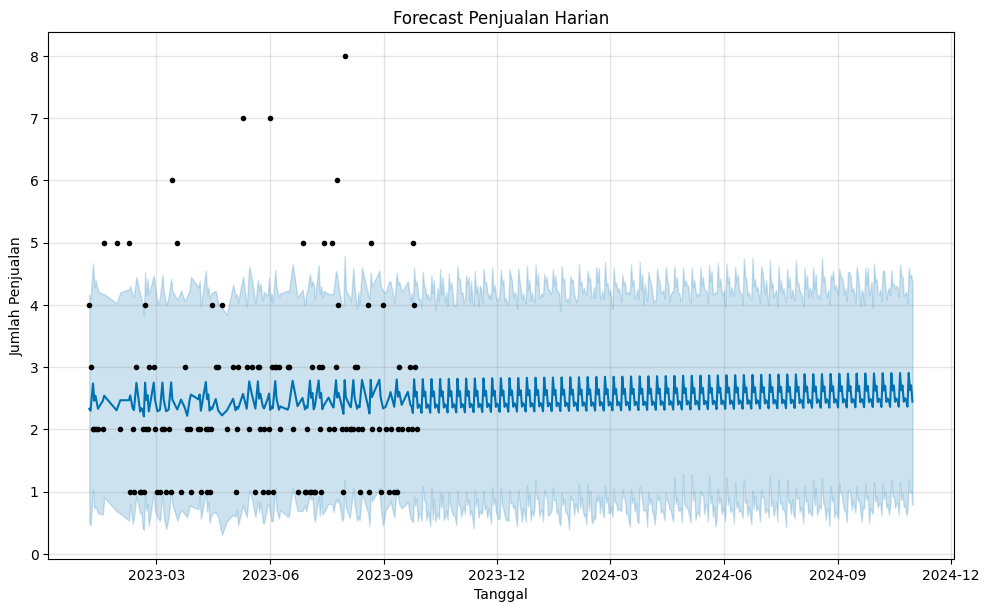

In [218]:
fig = model.plot(forecast)
plt.title('Forecast Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penjualan')
plt.show()
# membuat hasil prediksi dalam grafik

In [219]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(400)
# menampilkan data prekdisi dalam tabel

,ds,yhat,yhat_lower,yhat_upper
133,2023-09-28,2.342590,0.519472,4.221882
134,2023-09-29,2.396560,0.653505,4.080965
135,2023-09-30,2.367485,0.645653,4.095140
136,2023-10-01,2.264468,0.533945,3.958749
137,2023-10-02,2.805944,1.086649,4.533611
...,...,...,...,...
528,2024-10-27,2.364500,0.682905,4.021076
529,2024-10-28,2.905977,1.192153,4.595997
530,2024-10-29,2.628795,0.987600,4.446846
531,2024-10-30,2.705929,0.997962,4.482789
